In [43]:
import numpy
import pandas
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import scipy
from scipy.spatial.distance import cdist


docWord = numpy.load("science2k-doc-word.npy")
wordDoc = numpy.load("science2k-word-doc.npy")
words = pandas.read_csv("science2k-vocab.txt", header=None, names=['word'])
titles = pandas.read_csv("science2k-titles.txt", header=None, names=['title'])

# Part A

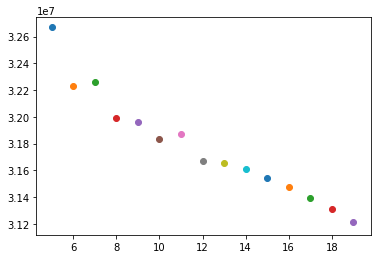

In [80]:
for k in xrange(5,20):
    kMeans = sklearn.cluster.KMeans(k).fit(docWord)
    plt.scatter(k,kMeans.inertia_)

In [214]:
docWord = numpy.asarray(docWord)
avgVector = numpy.mean(docWord, axis = 0)
docWordNorm = docWord - avgVector
kMeansDoc = KMeans(8).fit(docWordNorm)

In [215]:
ordered_cluster_centers = kMeansDoc.cluster_centers_.argsort()[:,::-1]
counter = 1

for cluster in ordered_cluster_centers:
    print "Top 10 Words for Cluster " + str(counter)
    counter+=1
    
    for index in numpy.argsort(cluster)[::-1][:10]:
        print words.iloc[index]["word"]
    print "\n\n\n"
    


Top 10 Words for Cluster 1
combinations
publication
trf4
silica
needs
planar
depths
subjects
wang
taylor




Top 10 Words for Cluster 2
firing
overcome
tube
droplets
codon
incomplete
instruments
circuits
synuclein
september




Top 10 Words for Cluster 3
projects
rat
challenge
team
mediated
organism
contacts
male
benthic
fed




Top 10 Words for Cluster 4
resonant
peripheral
planar
establish
fret
stream
anion
protease
food
calculate




Top 10 Words for Cluster 5
exhibited
forces
percentage
fault
building
barrier
galaxies
locus
moved
eukaryotic




Top 10 Words for Cluster 6
shallow
decline
occupied
unc
loci
astronomy
coherence
grant
serves
respond




Top 10 Words for Cluster 7
serum
hughes
microbial
causing
asymmetry
scattering
considerable
failure
rms
compositions




Top 10 Words for Cluster 8
spent
orfs
purple
acc
camp
adp
bodies
extremes
healthy
projection






In [216]:
for i,center in enumerate(kMeansDoc.cluster_centers_):
    print "Cluster " + str(i+1)
    distance = cdist(center.reshape(1,5476),docWordNorm)
    closestDocs = (distance.flatten()).argsort()[:10]
    print titles.iloc[closestDocs]
    print 
    print
 

Cluster 1
                                               title
519     Algorithmic Gladiators Vie for Digital Glory
574  Reopening the Darkest Chapter in German Science
453    Information Technology Takes a Different Tack
0                       Archaeology in the Holy Land
777               Divining Diet and Disease from DNA
90            Heretical Idea Faces Its Sternest Test
1         Baedeker's Guide, or Just Plain 'Trouble'?
790                        The Violence of the Lambs
499  National Academy of Sciences Elects New Members
431             Movement Patterns in Spoken Language


Cluster 2
                                                  title
983              Ubiquitination: More Than Two to Tango
902                          On the Ancestry of Barrels
302   Thermal, Catalytic, Regiospecific Functionaliz...
888   Structure of Yeast Poly(A) Polymerase Alone an...
760             ER-to-Golgi Traffic: This Bud's for You
1010              New Insights into an Old Modification
833

# Part B

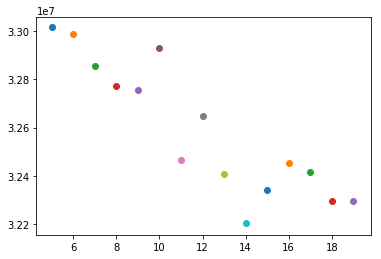

In [84]:
for k in xrange(5,20):
    kMeans = sklearn.cluster.KMeans(k).fit(wordDoc)
    plt.scatter(k,kMeans.inertia_)

In [217]:
wordDoc = numpy.asarray(wordDoc)
avgVector2 = numpy.mean(wordDoc, axis = 0)
wordDocNorm = wordDoc - avgVector2
kMeansWord = KMeans(11).fit(wordDocNorm)

In [218]:
ordered_cluster_centers2 = kMeansWord.cluster_centers_.argsort()[:,::-1]
counter = 1

for cluster in ordered_cluster_centers2:
    print "Top 10 Documents for Cluster " + str(counter)
    counter+=1
    
    for index in numpy.argsort(cluster)[::-1][:10]:
        print titles.iloc[index]["title"]
    print "\n\n\n"
    

Top 10 Documents for Cluster 1
Rapid Destruction of Human Cdc25A in Response to DNA Damage
Protecting Communities in Biomedical Research
NEAR at Eros: Imaging and Spectral Results
The Global Carbon Cycle: A Test of Our Knowledge of Earth as a System
Moissanite: A Window for High-Pressure Experiments
Xenon as a Complex Ligand: The Tetra Xenono Gold(II) Cation in <latex>$AuXe_4^{2+}(Sb_2F_{11}^-)_2$</latex>
Global Water Resources: Vulnerability from Climate Change and Population Growth
Structure of the S15,S6,S18-rRNA Complex: Assembly of the 30S Ribosome Central Domain
Transport of Peptide: MHC Class II Complexes in Developing Dendritic Cells
The Genetic Legacy of Paleolithic Homo sapiens sapiens in Extant Europeans: A Y Chromosome Perspective




Top 10 Documents for Cluster 2
Corrections and Clarifications: Commercialization of Genetic Research and Public Policy
Designer Labs: Architecture Discovers Science
DNA Topoisomerase IIb and Neural Development
The Mother of All HIV Challenges


In [219]:
for j,center2 in enumerate(kMeansWord.cluster_centers_):
    print "Cluster " + str(j+1)
    distance = cdist(center2.reshape(1,1373),wordDocNorm)
    closestWords = (distance.flatten()).argsort()[:10]
    print words.iloc[closestWords]
    print 
    print
 


Cluster 1
                 word
5322             lcts
5411             neas
4975  proteorhodopsin
5007             pax8
3399              ag7
5454             trxr
4995             dnag
5279         aptamers
5261             rory
5458            lg268


Cluster 2
             word
4435  illustrates
2667          rde
2669  transposase
5411         neas
5428          iih
5454         trxr
5458        lg268
5384          hge
5383        kar9p
5281          kcv


Cluster 3
            word
11    sciencemag
9            org
4            end
12           vol
2        science
3399         ag7
4995        dnag
5411        neas
2363       lenti
4535       nompc


Cluster 4
                 word
4                 end
3399              ag7
5279         aptamers
5454             trxr
4995             dnag
4535            nompc
5411             neas
4975  proteorhodopsin
5322             lcts
5281              kcv


Cluster 5
            word
332     directly
4            end
9            org
11   